In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('drive/My Drive/Colab Notebooks/static.csv')
df

,id,filename,sha256,isSigned,isPacked,MajorLinkerVersion,MinorLinkerVersion,SizeOfUninitializedData,ImageBase,FileAlignment,...,win_private_profile,win_files_operation,Str_Win32_Winsock2_Library,Str_Win32_Wininet_Library,Str_Win32_Internet_API,Str_Win32_Http_API,ldpreload,mysql_database_presence,suspicious_dbgts,family
0,0,7259675aad35bed593ec88a0f96263e182eaac06043f25...,7259675aad35bed593ec88a0f96263e182eaac06043f25...,0,0,2,25,0,4194304,512,...,0,1,0,0,0,0,0,0,-1,Malware
1,1,CNET_205789.exe,CNET_205789,0,0,11,0,0,4194304,512,...,0,0,0,0,0,0,0,0,-1,Benign
2,2,CNET_2303.exe,CNET_2303,1,0,8,0,0,4194304,512,...,0,0,0,0,0,0,0,0,0,Benign
3,3,9c391e9b2e0d0bf71ac18c3af61886a69e6c41bb09f7c7...,9c391e9b2e0d0bf71ac18c3af61886a69e6c41bb09f7c7...,0,1,12,0,0,4194304,512,...,0,1,1,1,1,1,0,0,0,Malware
4,4,8e5e93b6f3eee7f1a08a0420b25105017d3479769e6bf9...,8e5e93b6f3eee7f1a08a0420b25105017d3479769e6bf9...,-1,0,11,0,0,4194304,512,...,0,1,0,0,0,0,0,0,0,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18510,18514,783fae2f00bf40b28d4bf712716dd2bedbe75834d6de42...,783fae2f00bf40b28d4bf712716dd2bedbe75834d6de42...,0,0,8,0,0,4194304,512,...,0,0,0,0,0,0,0,0,-1,Malware
18511,18515,20bb2a2cfbd8ed39ee218be6049140c68c7b2b2ea446ca...,20bb2a2cfbd8ed39ee218be6049140c68c7b2b2ea446ca...,-1,1,11,0,0,4194304,512,...,0,1,0,0,0,0,0,0,0,Malware
18512,18516,CNET_201693.exe,CNET_201693,0,0,8,0,0,4194304,4096,...,0,0,0,0,0,0,0,0,0,Benign
18513,18517,Sourceforge_4889.exe,Sourceforge_4889,-1,0,11,0,0,4194304,512,...,0,1,1,0,0,1,0,0,0,Benign


In [ ]:
df.dropna(subset=['family'], inplace=True)
threshold = df['family'].value_counts()
threshold

Benign     9991
Malware    8524
Name: family, dtype: int64

In [ ]:
df = df[df.isin(threshold.index[threshold >= 800]).values]
df
features = df.columns[3:-1]
features

Index(['isSigned', 'isPacked', 'MajorLinkerVersion', 'MinorLinkerVersion',
       'SizeOfUninitializedData', 'ImageBase', 'FileAlignment',
       'MajorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum',
       'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve',
       'SizeOfHeapReserve', 'NumberOfSections', 'e_cblp', 'e_lfanew',
       'SizeOfRawData', 'Characteristics', 'Misc', 'BaseOfData',
       'inject_thread', 'create_process', 'persistence', 'hijack_network',
       'create_service', 'create_com_service', 'network_udp_sock',
       'network_tcp_listen', 'network_dyndns', 'network_toredo',
       'network_smtp_dotNet', 'network_smtp_raw', 'network_smtp_vb',
       'network_p2p_win', 'network_tor', 'network_irc', 'network_http',
       'network_dropper', 'network_ftp', 'network_tcp_socket', 'network_dns',
       'network_ssl', 'network_dga', 'bitcoin', 'certificate', 'escalate_priv',


In [ ]:
X = df[features].values
X

array([[ 0,  0,  2, ...,  0,  0, -1],
       [ 0,  0, 11, ...,  0,  0, -1],
       [ 1,  0,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  8, ...,  0,  0,  0],
       [-1,  0, 11, ...,  0,  0,  0],
       [-1,  0,  8, ...,  0,  0,  0]])

In [ ]:
y = df.iloc[:, -1].values
y

array(['Malware', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

y_df = pd.DataFrame(y, dtype=str)
y_df.apply(le.fit_transform)


,0
0,1
1,0
2,0
3,1
4,1
...,...
18510,1
18511,1
18512,0
18513,0


In [ ]:
y = y_df.apply(le.fit_transform).values[:, :]
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
encoded_labels = dict(zip(le.classes_, le.transform(le.classes_)))
target_names = list(encoded_labels.keys())
target_names

['Benign', 'Malware']

In [ ]:
class_column = ['family']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

array([[ 0,  1, 48, ...,  0,  0, -1],
       [ 0,  1, 48, ...,  0,  0, -1],
       [ 0,  0, 14, ...,  0,  0, -1],
       ...,
       [ 0,  1,  6, ...,  0,  0, -1],
       [ 0,  0,  8, ...,  0,  0, -1],
       [ 0,  0,  6, ...,  0,  0, -1]])

In [ ]:
X_test

array([[ 0,  1,  8, ...,  0,  0, -1],
       [ 0,  0,  8, ...,  0,  0, -1],
       [ 1,  0, 11, ...,  0,  0,  0],
       ...,
       [ 0,  0,  6, ...,  0,  0, -1],
       [ 0,  0,  8, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  0,  0,  0]])

In [ ]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
y_train = y_train.ravel() # Return a contiguous flattened array - a 1-D array
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = X_train
scaler = MinMaxScaler()
scaler.fit(data)
scaler.transform(data)

X_train = scaler.transform(data)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.5  , 1.   , 0.6  , ..., 0.   , 0.   , 0.   ],
       [0.5  , 1.   , 0.6  , ..., 0.   , 0.   , 0.   ],
       [0.5  , 0.   , 0.175, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.5  , 1.   , 0.075, ..., 0.   , 0.   , 0.   ],
       [0.5  , 0.   , 0.1  , ..., 0.   , 0.   , 0.   ],
       [0.5  , 0.   , 0.075, ..., 0.   , 0.   , 0.   ]])

In [ ]:
X_test

array([[0.5   , 1.    , 0.1   , ..., 0.    , 0.    , 0.    ],
       [0.5   , 0.    , 0.1   , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.    , 0.1375, ..., 0.    , 0.    , 0.5   ],
       ...,
       [0.5   , 0.    , 0.075 , ..., 0.    , 0.    , 0.    ],
       [0.5   , 0.    , 0.1   , ..., 0.    , 0.    , 0.5   ],
       [0.5   , 0.    , 0.1375, ..., 0.    , 0.    , 0.5   ]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
!pip install xgboost==1.6.0
from xgboost import XGBClassifier

algorithms = {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBoost": XGBClassifier()
}

# Different cross-validation parameters for different algorithms  (see which performs the best; can experiment with other parameters to get optimal accuracy) ; key as algorithm name and value as parameters to test
algorithms_parameters = {
    "Decision Tree": {'max_depth': range(5, 30)}, 
    "Random Forest": {'n_estimators': range(50, 150)},
    "Gradient Boosting": {'n_estimators': range(50, 150)},
    "XGBoost": {'n_estimators': range(50, 150)} 
}

# Dictionary to store different testing accuracies; key as best estimator and value as testing accuracy
test_accuracy = {}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
print("\nTraining algorithms...\n")
for algo in algorithms:
        # Cross-validation training
        print("Training %s" % algo)
        clf = GridSearchCV(algorithms[algo], algorithms_parameters[algo], n_jobs=4)
        clf.fit(X_train, y_train)
        clf_best_performance = [clf.best_score_, clf.best_params_]
        print("%s : Best Training Score - %s, Best Training Params %s" % (algo, clf.best_score_, clf.best_params_))
        clf_best_model = clf.best_estimator_
        
        # Testing accuracy with best estimator
        y_pred = clf_best_model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions) # Get mean accuracy score on test set using each classifier with its best parameters
        print("The best estimator for %s algorithm has an accuracy score of %s during testing." %(algo, accuracy))

        test_accuracy[clf_best_model] = accuracy # Save best model for each algorithm and its test accuracy score


Training algorithms...

Training Decision Tree
Decision Tree : Best Training Score - 0.9779909680568561, Best Training Params {'max_depth': 29}
The best estimator for Decision Tree algorithm has an accuracy score of 0.9754253308128544 during testing.
Training Random Forest
Random Forest : Best Training Score - 0.9866327287046657, Best Training Params {'n_estimators': 89}
The best estimator for Random Forest algorithm has an accuracy score of 0.985417229273562 during testing.
Training Gradient Boosting
Gradient Boosting : Best Training Score - 0.9813667006745131, Best Training Params {'n_estimators': 166}
The best estimator for Gradient Boosting algorithm has an accuracy score of 0.9789359978395895 during testing.
Training XGBoost
XGBoost : Best Training Score - 0.9868353173269332, Best Training Params {'n_estimators': 125}
The best estimator for XGBoost algorithm has an accuracy score of 0.9856872805833108 during testing.


In [ ]:
best_algorithm_by_accuracy = max(test_accuracy, key = test_accuracy.get)
best_algorithm_by_accuracy

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=125,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# Save the algorithm and the feature list for later predictions
for algorithm in test_accuracy:
  if "XGBClassifier" in str(algorithm): # Because XGBoost Model parameters are too long for file name...
    model_path = 'drive/My Drive/Colab Notebooks/MDML Files/XGBoost_model.joblib'
  else:
    model_path = 'drive/My Drive/Colab Notebooks/MDML Files/' + str(algorithm) + '_model.joblib'
  joblib.dump(algorithm, model_path) # Save the various models as a form of record
  print('\nSaved %s...' % algorithm)
target_path = 'drive/My Drive/Colab Notebooks/MDML Files/target.joblib'
features_path = 'drive/My Drive/Colab Notebooks/MDML Files/features.joblib'
scaler_path = 'drive/My Drive/Colab Notebooks/MDML Files/scaler.joblib'
joblib.dump(target_names, target_path)
joblib.dump(features, features_path)
joblib.dump(scaler, scaler_path)  


Saved DecisionTreeClassifier(max_depth=29)...

Saved RandomForestClassifier(n_estimators=89)...

Saved GradientBoostingClassifier(n_estimators=166)...

Saved XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=125,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)...


['drive/My Drive/Colab Notebooks/MDML Files/scaler.joblib']

In [ ]:
best_model_path = 'drive/My Drive/Colab Notebooks/MDML Files/model.joblib'
joblib.dump(best_algorithm_by_accuracy, best_model_path)

['drive/My Drive/Colab Notebooks/MDML Files/model.joblib']


Testing DecisionTreeClassifier(max_depth=29) ...

False Positive Rate (FPR): 2.352352 %
False Negative Rate (FNR): 2.580645 %


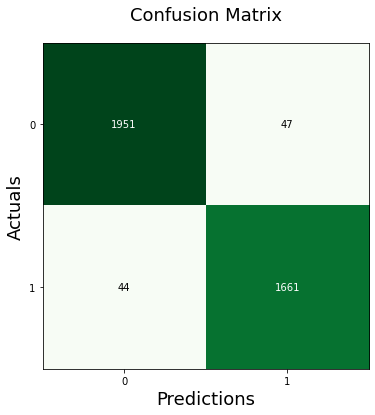


Testing RandomForestClassifier(n_estimators=89) ...

False Positive Rate (FPR): 1.401401 %
False Negative Rate (FNR): 1.524927 %


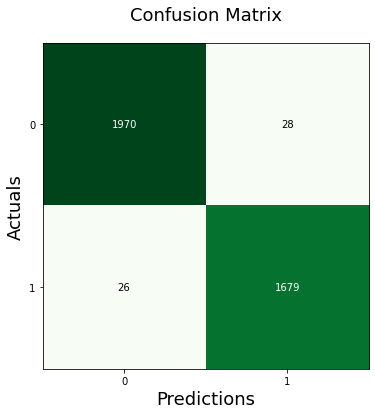


Testing GradientBoostingClassifier(n_estimators=166) ...

False Positive Rate (FPR): 2.402402 %
False Negative Rate (FNR): 1.759531 %


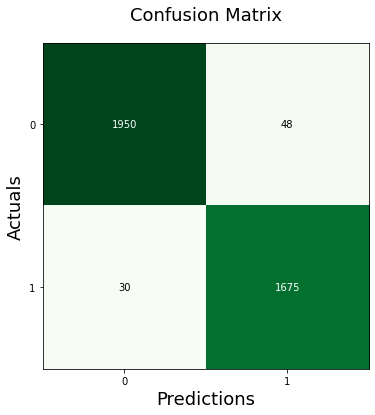


Testing XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=125,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) ...

False Positive Rate (FPR): 1.551552 %
False Negative Rate (FNR): 1.290323 %


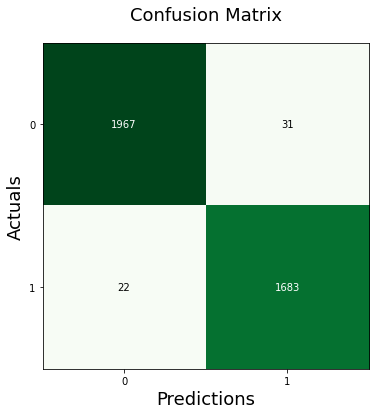

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# # Identify false and true positive rates
for algorithm in test_accuracy:
  print('\nTesting %s ...'% algorithm)
  res = algorithm.predict(X_test)
  mt = confusion_matrix(y_test, res)
  # FPR = FP/FP+TN
  # FNR = FN/FN+TP
  print("\nFalse Positive Rate (FPR): %f %%" % ((mt[0][1] / float(sum(mt[0]))) * 100)) # 1 --> Malware, 0 --> Benign
  print('False Negative Rate (FNR): %f %%' % ((mt[1][0] / float(sum(mt[1])) * 100)))

  # # Visualize results of the various algorithms
  fig, ax = plot_confusion_matrix(conf_mat=mt, figsize=(6, 6), cmap=plt.cm.Greens)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  if "XGBClassifier" in str(algorithm): # Because XGBoost Model parameters are too long for file name...
    plot_path = 'drive/My Drive/Colab Notebooks/MDML Files/XGBoost_plotfig'
  else:
    plot_path = 'drive/My Drive/Colab Notebooks/MDML Files/' + str(algorithm) + 'plotfig'
  plt.savefig(plot_path)
  plt.show()